# Pymaceuticals Inc.
---

### Analysis

The following observations can be made from the data.

   (1)The boxplot suggests that Ramicane and Capomulin may be more effective methods for consistently reducing tumor volume,          whereas Infubinol and Ceftamin exhibit greater variability in treatment outcomes. (It would be more useful to conduct            further statistical tests, such as ANOVA or t-tests, as they can provide insight into the significance of this                  observation.)
    
   (2)The scatter plot shows that as mouse weight increases, average tumor volume also increases, implying a positive                  relationship between mouse weight and average tumor volume for mice in the Capomulin regimen. This relationship is better        interpreted in the diagram with a regression line that measures the correlation coefficient (0.88). However, while there        is a clear positive correlation, it is not very strong due to the variability in the data.
    
   (3)An example of a line graph for mouse ID m601, treated with Capomulin, shows that tumor volume decreases over time,              demonstrating the effectiveness of the Capomulin treatment. It illustrates an approximate reduction in tumor volume of 30        mm3 in less than 50 days.
       
   (4)The pie chart shows that the distribution of mice by gender is generally balanced, with males (51%) and females (49%)            almost equally represented.  
    
   (5)The bar chart indicates that the number of observed mouse timepoints is higher for Capomulin and Ramicane, while all            other regimens, except for Propriva, are at almost the same level.
    
    
.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Specify the desired column 
desired_order = ["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]

# Order by the columns
combined_data_reordered = combined_data.reindex(columns=desired_order)

# Display the combined and reordered DataFrame
combined_data_reordered.head()







,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [3]:
# Checking the number of mice.
# the number of unique mice
unique_mice = combined_data_reordered["Mouse ID"].nunique()

print(f"The number of Unique Mice: {unique_mice}")

The number of Unique Mice: 249


In [4]:

# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that show up for Mouse ID and Timepoint, keep =False implies all duplicates True so that we
#get them
duplicate_combinations = combined_data_reordered[combined_data_reordered.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# From the Mouse ID column, drop duplicate rows
duplicate_mouse_ids = duplicate_combinations["Mouse ID"].drop_duplicates()

#  Mouse IDs converting to a NumPy array with dtype 'object'
duplicate_ids_array = duplicate_mouse_ids.to_numpy(dtype=object)

# Format, display as an array with dtype
formatted_result = f"{repr(duplicate_ids_array)}"

print("Duplicate Mouse IDs as Array:")
print(formatted_result)






Duplicate Mouse IDs as Array:
array(['g989'], dtype=object)


In [5]:
# Optional: Get all the data for the duplicate mouse ID
# DataFrame for Mouse ID 'g989'
duplicate_mouse_data = combined_data_reordered[combined_data_reordered['Mouse ID'] == 'g989']

# Display the duplicate Mouse ID 'g989' in a DataFrame table
display(duplicate_mouse_data)



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.




# Remove rows with Mouse ID 'g989' as per timepoint requirement, and keep other IDs
cleaned_data = combined_data_reordered[combined_data_reordered['Mouse ID'] != 'g989']

# Display the cleaned DataFrame
cleaned_data.head()






,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [8]:
# Checking the number of mice in the clean DataFrame.

# We need to exclude the previously found Mouse ID in the Timepoint
# Check the number of unique mice in the cleaned_data DataFrame
num_mice = cleaned_data['Mouse ID'].nunique()
print("Number of Mice (unique) in the cleaned_data DataFrame:", num_mice)




Number of Mice (unique) in the cleaned_data DataFrame: 248


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



# Group the data by 'Drug Regimen' as required
grouped_data = cleaned_data.groupby('Drug Regimen')

# Calculate the mean, median, variance, SD, and SEM for tumor volume
summary_statistics = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns as required
summary_statistics = summary_statistics.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Deviation',
    'sem': 'Tumor Volume SEM'
})

# Display the summary statistics DataFrame
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']) \
    .rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance',
                     'std': 'Tumor Volume Std. Deviation', 'sem': 'Tumor Volume SEM'})

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

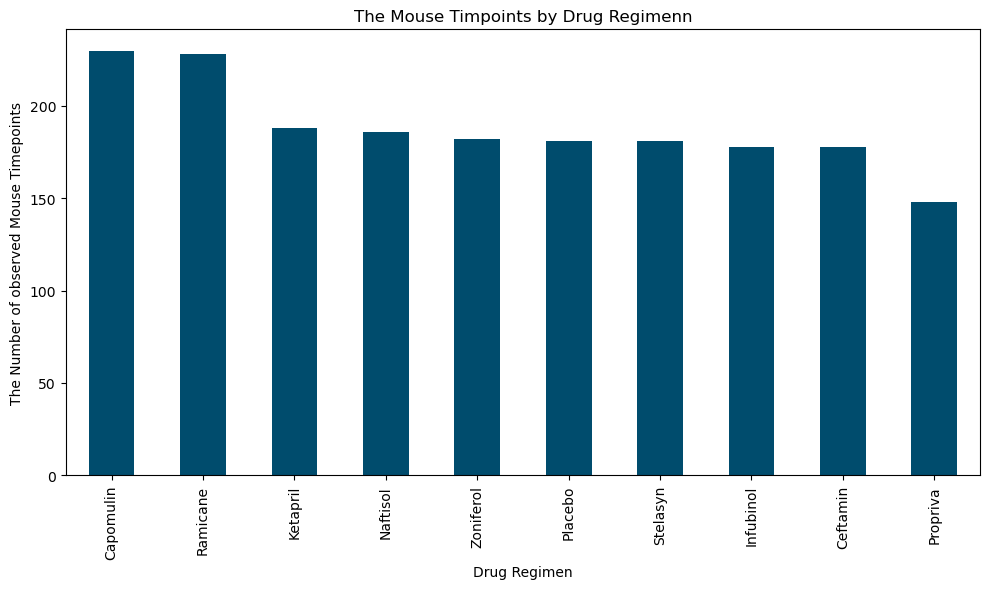

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


# Group the data by 'Drug Regimen' and row counts, using the pandas function ''.value_counts() 
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Create the bar chart, with prefered colour and size
regimen_counts.plot(kind='bar', figsize=(10, 6), color='#004c6d')

# labels and title
plt.title('The Mouse Timpoints by Drug Regimenn')
plt.xlabel('Drug Regimen')
plt.ylabel('The Number of observed Mouse Timepoints')

# Display 
plt.tight_layout()
plt.show()


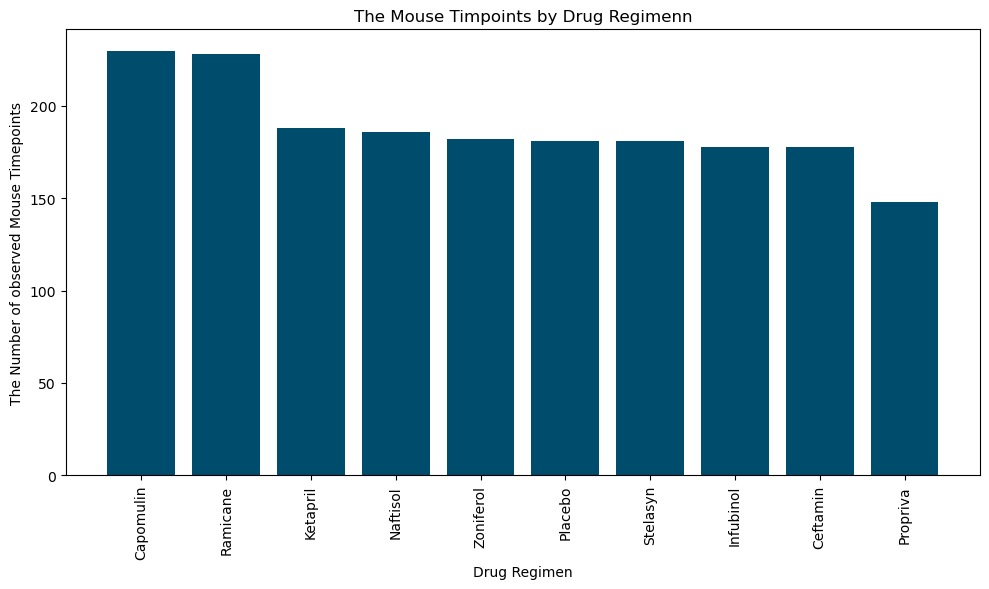

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.



# Group the data by 'Drug Regimen' and row counts 
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# regimen names and counts
regimen_names = regimen_counts.index
counts = regimen_counts.values

# Create a bar chart using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_names, counts, color='#004c6d')

# labels and title
plt.title('The Mouse Timpoints by Drug Regimenn')
plt.xlabel('Drug Regimen')
plt.ylabel('The Number of observed Mouse Timepoints')

# Rotate the x-axis labels making it readable clearly
plt.xticks(rotation=90)

# Display 
plt.tight_layout ()
plt.show()


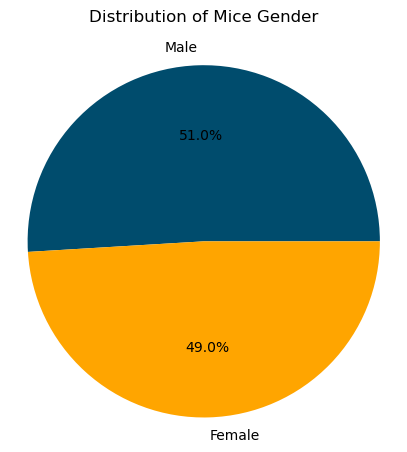

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


# Count the numbers in each gender
gender_counts = cleaned_data['Sex'].value_counts()

# Create the pie chartt using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#004c6d', 'orange'], figsize=(5, 5))

# Title and labels, moving title upper making the gap larger between title and lable, Male
plt.title('Distribution of Mice Gender', y=1.05)
plt.ylabel('') 

# Display 
plt.axis('equal')  
plt.show()


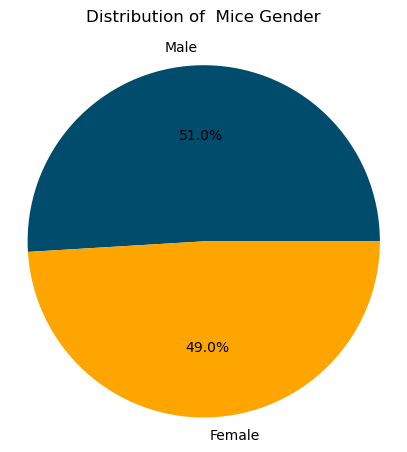

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



# Count the numbers in each gender
gender_counts = cleaned_data['Sex'].value_counts()

# Create a pie chart using pyplot
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#004c6d', 'orange'])

# Title and labels, moving title upper making the gap larger between title and lable, Male
plt.title('Distribution of  Mice Gender', y=1.05)

# Display
plt.axis('equal') 
plt.show()


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Treatment regimens 
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the data, .isin() function values in the series against treatment regimens
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(treatment_regimens)]

# Find the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the last_timepoint DataFrame with the original DataFrame 
final_tumor_volume = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Display 
final_tumor_volume.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [20]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    
 # Treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list 
tumor_volume_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Select the drug regimen column, checks against the treatment
    subset_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]
    
    # Tumor volume data for the current treatment regimen
    tumor_volume = subset_data['Tumor Volume (mm3)']
    
    # Append the tumor volume data to list created
    tumor_volume_data.append(tumor_volume)
    
    # Calculate the quartiles and IQR ( the current treatment regimen)
    quartiles = tumor_volume.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    #Identify the outliers, calculate the lower and upper bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Determine outliers
    potential_outliers = subset_data[(subset_data['Tumor Volume (mm3)'] < lower_bound) | (subset_data['Tumor Volume (mm3)'] > upper_bound)]
    
    # Results for the current treatment regimen in detail
    print(f"Treatment: {treatment}")
    print(f"IQR: {iqr}")
    print(f"Lower Quartile: {lower_quartile}")
    print(f"Upper Quartile: {upper_quartile}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {potential_outliers}\n")





Treatment: Capomulin
IQR: 7.781863460000004
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []

Treatment: Ramicane
IQR: 9.098536719999998
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []

Treatment: Infubinol
IQR: 11.477135160000003
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers:    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
15     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g

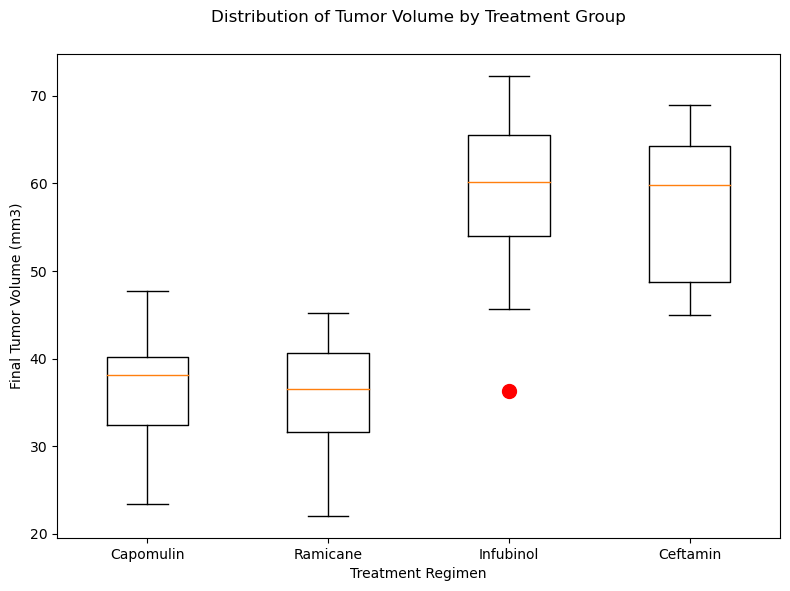

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


# Create a dictionary for each treatment group
treatment_data = {}


for treatment in treatments:
    # Filter the data for the current treatment
    subset_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]
    
    # Get the tumor volume data
    tumor_volume = subset_data['Tumor Volume (mm3)']
    
    # Store the data in the dictionary
    treatment_data[treatment] = tumor_volume

# Create tumor volume data for box plot plotting 
data_to_plot = list(treatment_data.values())

#  labels for plotting
labels = list(treatment_data.keys())

# Create a box plot as per required size
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(data_to_plot, labels=labels, sym='ro', flierprops=dict(marker='o', markersize=10 ))

# Title and labels
plt.title('Distribution of Tumor Volume by Treatment Group', y=1.05)
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

# Display
plt.xticks()
plt.tight_layout()
plt.show()


## Line and Scatter Plots

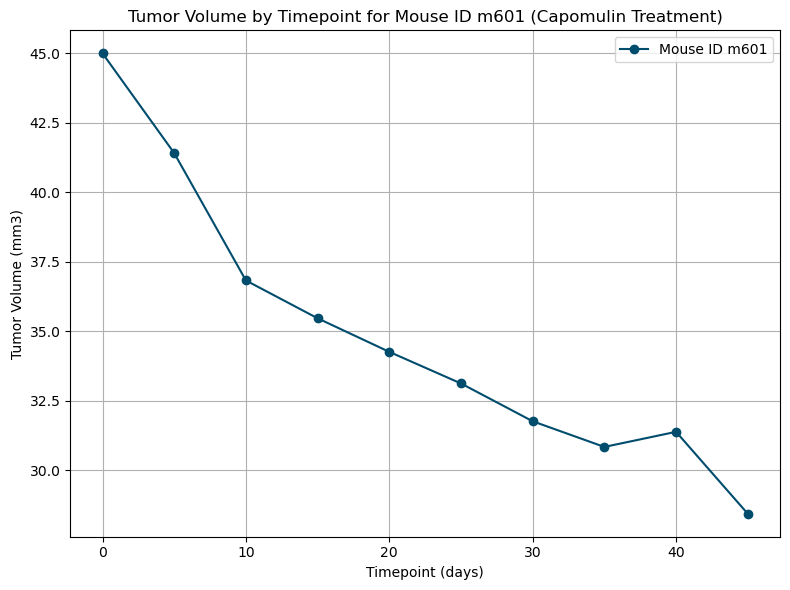

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin




# Choose the mouse 'm601 treated with Capomulin 
selected_mouse_id = 'm601'

# Filter the data for m601 and Capomulin treatment regimen
selected_mouse_data = combined_data_reordered[(combined_data_reordered['Mouse ID'] == selected_mouse_id) & (combined_data_reordered['Drug Regimen'] == 'Capomulin')]

# Create a line plot (tumor volume vs. time point), prefered size, colour
plt.figure(figsize=(8, 6))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', color='#004c6d', label=f'Mouse ID {selected_mouse_id}')

# Title and labels
plt.title(f'Tumor Volume by Timepoint for Mouse ID {selected_mouse_id} (Capomulin Treatment)')
plt.xlabel(f'Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Add legend
plt.legend()

# Display
plt.grid()
plt.tight_layout()
plt.show()







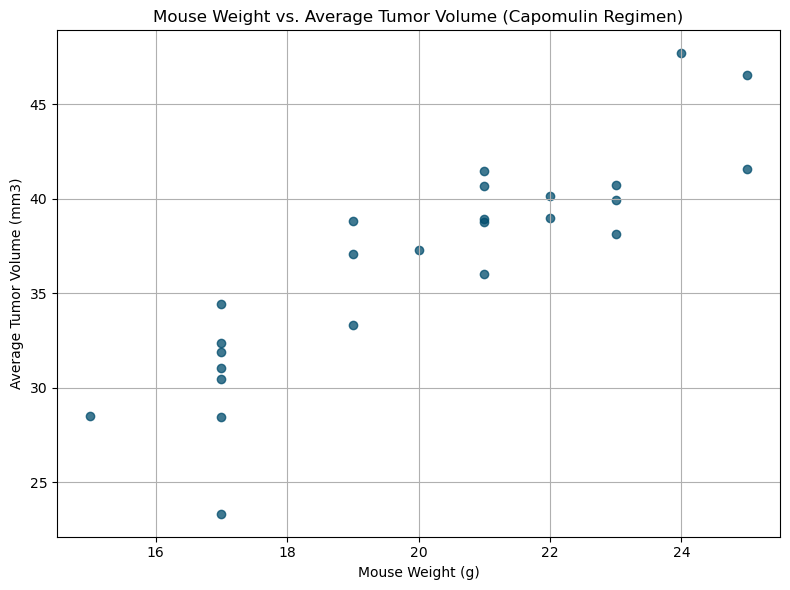

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen



# Filter the data for the Capomulin treatment regimen
capomulin_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume in the Capomulin regimen for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the mouse weight for each mouse in the Capomulin regimen
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, average_tumor_volume, color='#004c6d', alpha=0.75)

# Title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display
plt.grid()
plt.tight_layout()
plt.show()


## Correlation and Regression

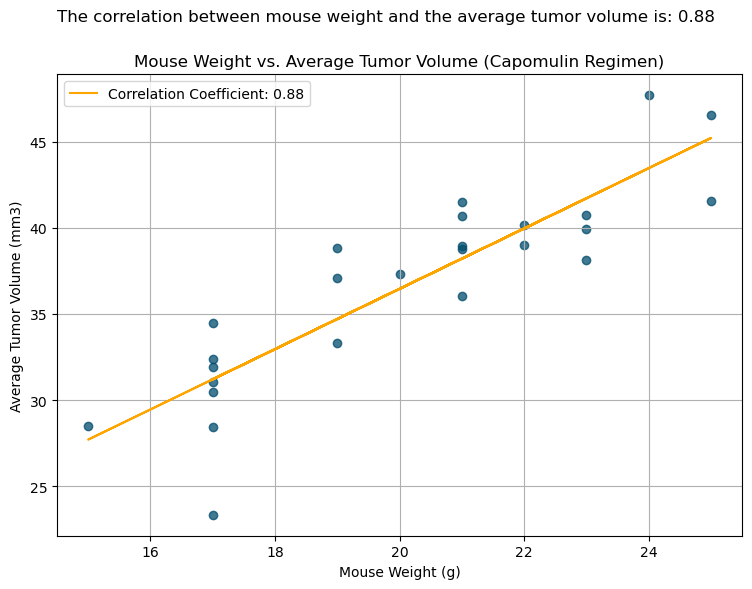

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen



# Filter the data for the Capomulin treatment regimen
capomulin_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse in the Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the  mouse weight for each mouse in the Capomulin regimen
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Calculate the correlation coefficient (between mouse weight and average tumor volume)
correlation_coefficient = np.corrcoef(mouse_weight, average_tumor_volume)[0, 1]

# Create a scatter plot with prefered size and colour
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, average_tumor_volume, color='#004c6d', alpha=0.75)

# linear regression to fit a line to the data
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)

# Create a regression line
regression_line = slope * mouse_weight + intercept

# The regression line
plt.plot(mouse_weight, regression_line, color='orange', label=f'Correlation Coefficient: {correlation_coefficient:.2f}')

# Title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add legend
plt.legend()
# Add text for correlation coefficient above the diagram, 14.5, 52 adjusted the position of the text 
plt.text(14.5, 52, f'The correlation between mouse weight and the average tumor volume is: {correlation_coefficient:.2f}', fontsize=12, color='black')

# Display
plt.grid()
plt.tight_layout()
plt.show()
